<a href="https://colab.research.google.com/github/nagabathula/C255-DataMIning/blob/main/Assignment2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nagabathula","key":"7d804089a3ac8fb343251b2faadde02b"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [4]:
!ls ~/.kaggle

kaggle.json


In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
kaggleashwin/population-dataset                                World Population by Countries Dataset (1960-2021)    69KB  2022-08-31 05:30:26           1049         47  1.0              
iamsouravbanerjee/house-rent-prediction-dataset                House Rent Prediction Dataset                        82KB  2022-08-20 13:49:03           8481        234  1.0              
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           2394         95  1.0              
sveta151/tiktok-popular-songs-2021                             Ti

In [ ]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 98% 801M/814M [00:09<00:00, 67.7MB/s]
100% 814M/814M [00:09<00:00, 85.9MB/s]


# New Section

In [ ]:
!unzip dogs-vs-cats-redux-kernels-edition/test.zip

In [ ]:
!unzip dogs-vs-cats-redux-kernels-edition/train.zip

In [7]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 9.8 MB/s 
     |████████████████████████████████| 167 kB 68.9 MB/s 
     |████████████████████████████████| 1.7 MB 65.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 5.7 MB/s 
     |████████████████████████████████| 17.0 MB 47.7 MB/s 
     |████████████████████████████████| 3.3 MB 49.5 MB/s 
     |████████████████████████████████| 268 kB 57.6 MB/s 
     |████████████████████████████████| 636 kB 64.6 MB/s 
     |████████████████████████████████| 88 kB 8.7 MB/s 
     |████████████████████████████████| 1.3 MB 51.5 MB/s 
     |████████████████████████████████| 10.4 MB 20.7 MB/s 
     |████████████████████████████████| 6.8 MB 53.7 MB/s 
     |████████████████████████████████|

In [3]:
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 54.6MB/s]


In [14]:
!ls ./house-prices-advanced-regression-techniques/

house-prices-advanced-regression-techniques.zip  test.csv
sample_submission.csv				 train.csv


In [20]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/content/house-prices-advanced-regression-techniques/train.csv')
dataset.shape
dataset.head


<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [21]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1387, 81)
Unseen Data For Predictions: (73, 81)


In [23]:
from pycaret.regression import *
exp_clf101 = setup(data = data, target = 'SalePrice', session_id=123,use_gpu=True) 

,Description,Value
0,session_id,123
1,Target,SalePrice
2,Original Data,"(1387, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(970, 408)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='SalePrice',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [24]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,18803.4442,1.124238e+09,32724.8563,0.8134,0.1502,0.1049,0.210
gbr,Gradient Boosting Regressor,18550.2613,1.097649e+09,31672.4553,0.8048,0.1474,0.1064,0.804
rf,Random Forest Regressor,19609.5791,1.225501e+09,34088.9049,0.7921,0.1610,0.1143,2.612
ada,AdaBoost Regressor,26932.4263,1.608100e+09,39634.3437,0.7365,0.2220,0.1780,0.453
et,Extra Trees Regressor,24448.7963,1.795517e+09,41081.0285,0.7072,0.1963,0.1422,2.663
omp,Orthogonal Matching Pursuit,18853.3302,1.432902e+09,34838.6855,0.7056,0.1547,0.1101,0.026
ridge,Ridge Regression,21082.3613,1.656018e+09,38490.7226,0.6778,0.2206,0.1247,0.088
llar,Lasso Least Angle Regression,20819.7753,1.678063e+09,37902.0039,0.6580,0.2290,0.1261,0.297
en,Elastic Net,22078.9022,1.905568e+09,41408.3054,0.6395,0.1746,0.1262,0.282
lasso,Lasso Regression,22224.8457,1.815118e+09,39441.4448,0.6302,0.2638,0.1370,0.243


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [25]:
models()

INFO:logs:gpu_param set to True


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [26]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16728.2979,8.352671e+08,28900.9877,0.7999,0.1529,0.1027
1,16565.1455,7.605868e+08,27578.7378,0.8828,0.1301,0.0879
2,23490.3508,2.254654e+09,47483.1923,0.4917,0.1915,0.1357
3,15328.3881,8.056545e+08,28384.0542,0.7905,0.1601,0.1052
4,23963.5878,2.180890e+09,46699.9988,0.8094,0.1585,0.1071
5,17232.7973,8.311344e+08,28829.4019,0.8789,0.1459,0.0991
6,17591.1189,8.256593e+08,28734.2886,0.8767,0.1285,0.0946
7,20518.3600,1.076183e+09,32805.2331,0.8603,0.1560,0.1154
8,18696.7281,8.279973e+08,28774.9426,0.8913,0.1405,0.1005


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [27]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18469.0841,8.792650e+08,29652.4026,0.7894,0.1627,0.1153
1,19048.9597,7.775591e+08,27884.7460,0.8802,0.1447,0.1084
2,23384.3794,2.078231e+09,45587.6241,0.5314,0.1996,0.1442
3,19135.2438,1.433516e+09,37861.8062,0.6272,0.1881,0.1270
4,23491.1733,1.807623e+09,42516.1492,0.8420,0.1468,0.1074
5,16323.0646,6.662333e+08,25811.4956,0.9029,0.1514,0.1033
6,18868.6324,9.404880e+08,30667.3768,0.8596,0.1307,0.1001
7,23533.7418,1.682044e+09,41012.7241,0.7816,0.1812,0.1322
8,18500.3922,7.697899e+08,27745.0885,0.8989,0.1398,0.1033


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 4
INFO:logs:LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [28]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16535.0650,7.861558e+08,28038.4700,0.8117,0.1405,0.0991
1,16487.0952,6.248002e+08,24996.0034,0.9037,0.1249,0.0917
2,25313.7445,3.500120e+09,59161.8139,0.2109,0.2137,0.1547
3,15077.3656,6.048199e+08,24593.0858,0.8427,0.1506,0.1025
4,23254.2333,1.355566e+09,36818.0159,0.8815,0.1575,0.1156
5,16106.5346,8.041777e+08,28358.0264,0.8828,0.1434,0.0935
6,17910.5854,7.111650e+08,26667.6774,0.8938,0.1216,0.0985
7,18513.7328,7.892916e+08,28094.3342,0.8975,0.1440,0.1066
8,17938.7991,8.683297e+08,29467.4351,0.8860,0.1372,0.0983


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 5
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [29]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14830.4333,6.457979e+08,25412.5538,0.8453,0.1361,0.0921
1,16719.8077,8.717582e+08,29525.5509,0.8657,0.1237,0.0857
2,25564.2117,3.190518e+09,56484.6747,0.2807,0.2176,0.1518
3,14881.1676,7.488495e+08,27365.1151,0.8053,0.1501,0.0980
4,23853.5874,1.546259e+09,39322.5019,0.8649,0.1589,0.1147
5,17635.0662,8.415421e+08,29009.3447,0.8773,0.1503,0.1038
6,17106.7623,7.221804e+08,26873.4135,0.8922,0.1196,0.0911
7,22622.9048,1.188606e+09,34476.1634,0.8457,0.1561,0.1236
8,19370.0825,8.612925e+08,29347.7858,0.8869,0.1517,0.1087


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 6
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.02, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.85, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [31]:
gbr_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }
tuned_gbr = tune_model(gbr, custom_grid = gbr_params)

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), fold=None, round=4, n_iter=10, custom_grid={'num_leaves': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190]), 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'learning_rate': array([0.1, 0.2, 0.3

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:34:12
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


,Fold,MAE,MSE,RMSE,R2,RMSLE,MAPE


INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Gradient Boosting Regressor
INFO:logs:Declaring metric variables
INFO:logs:Defining Hyperparameters
INFO:logs:custom_grid: {'actual_estimator__num_leaves': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190]), 'actual_estimator__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'actual_estimator__learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
INFO:logs:Tuning with n_jobs=-1
INFO:logs:Initializing RandomizedSearchCV
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


ValueError: ignored

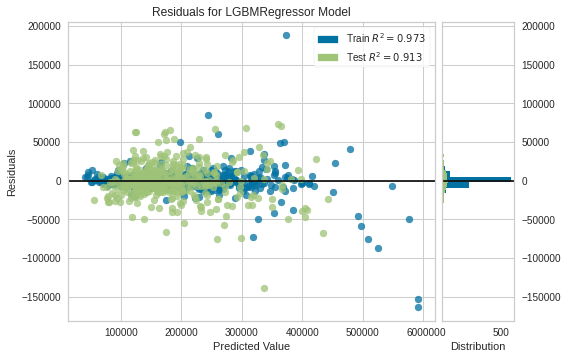

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [32]:
plot_model(tuned_lightgbm)

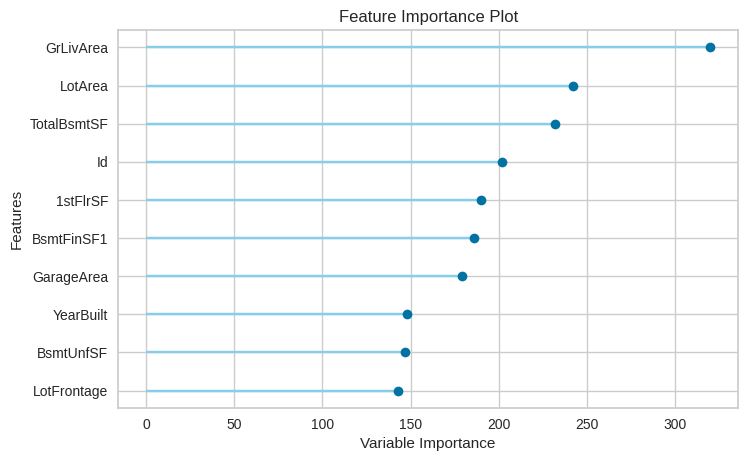

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [33]:
plot_model(tuned_lightgbm, plot='feature')

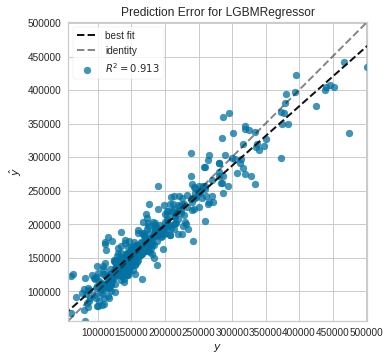

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [34]:
plot_model(tuned_lightgbm, plot = 'error')

In [35]:
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [36]:
predict_model(tuned_lightgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,16043.8997,5.215976e+08,22838.5121,0.9126,0.1328,0.0969


,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,828.0,65.0,8529.0,2001.0,2001.0,0.0,20.0,0.0,1434.0,1454.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,189000,188791.828729
1,1193.0,60.0,9600.0,1925.0,1994.0,0.0,0.0,0.0,702.0,702.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,125000,134951.795427
2,510.0,80.0,9600.0,1959.0,1959.0,132.0,991.0,0.0,50.0,1041.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,124500,147151.728840
3,763.0,72.0,8640.0,2009.0,2009.0,0.0,24.0,0.0,732.0,756.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,215200,210453.678342
4,1255.0,60.0,6931.0,2003.0,2004.0,92.0,0.0,0.0,746.0,746.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,165400,186597.579588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1009.0,43.0,12118.0,2004.0,2005.0,108.0,0.0,0.0,1710.0,1710.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,240000,239689.838621
413,694.0,60.0,5400.0,1921.0,1968.0,0.0,0.0,0.0,1073.0,1073.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,108480,110964.680950
414,86.0,121.0,16059.0,1991.0,1992.0,284.0,0.0,0.0,1288.0,1288.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260000,284571.121494
415,532.0,60.0,6155.0,1920.0,1999.0,0.0,0.0,0.0,611.0,611.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,128000,125197.652770


In [37]:
final_lightgbm = finalize_model(tuned_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=1

In [38]:
predict_model(final_lightgbm);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3433.4471,3.308361e+07,5751.8351,0.9945,0.0315,0.019


In [39]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,12912.5042,3.965700e+08,19914.0642,0.9111,0.1086,0.0797


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Label
0,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,156497.081631
1,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,Shed,500,10,2006,WD,Normal,90000,111164.513166
2,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,New,Partial,113000,125778.713040
3,87,60,RL,122.0,11911,Pave,NaN,IR2,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2009,WD,Normal,174000,169778.235021
4,90,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,123600,119338.325472
